# TITANIC DATA SURVIVAL

# STEP-1 COLLECTING DATA

# importing necessary libraries and loading dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import math
import matplotlib.pyplot as plt

t_data=pd.read_csv('C:/Users/91977/DATASETS_CSV/Titanic data.csv')
t_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# exploring data

In [2]:
print('# of passengers in original data:'+str(len(t_data.index)))

# of passengers in original data:891


In [3]:
len(t_data)

891

In [4]:
t_data.shape

(891, 12)

# STEP-2 ANALYZING DATA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0D10CC70>,
      dtype=object)

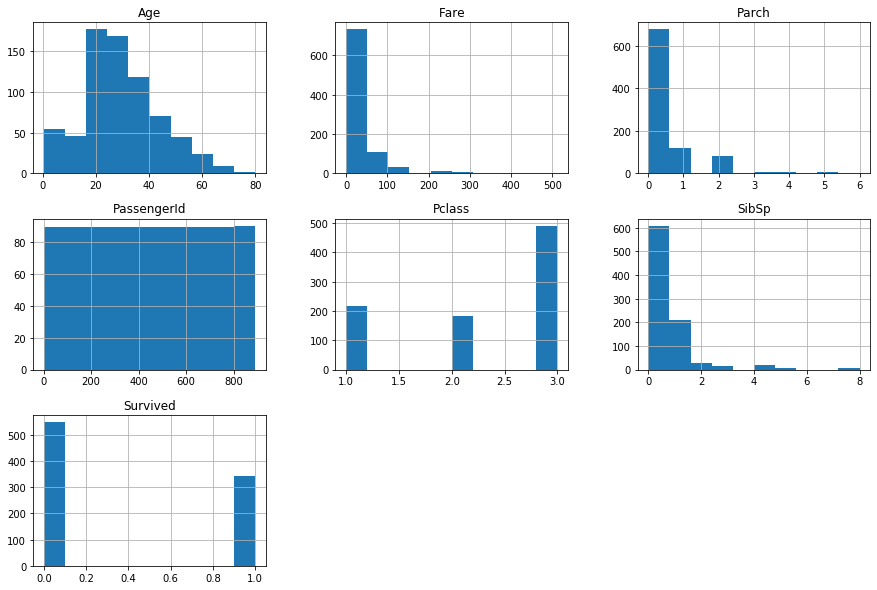

In [5]:
t_data.hist(figsize=(15,10))

# data visualizing by using countplot: gives the no of passengers survived

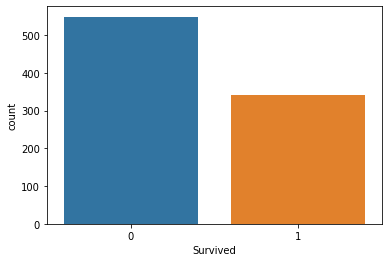

In [6]:
sns.countplot(x='Survived',data=t_data)

# beow code gives the no of males and females survived

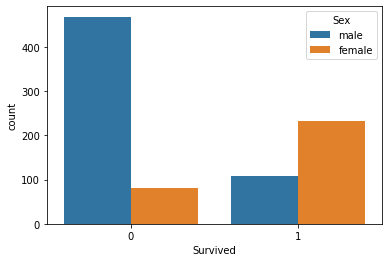

In [9]:
sns.countplot(x='Survived',hue='Sex',data=t_data)

# below code gives the survived passengers with respect to pclass

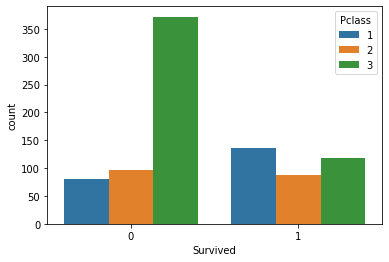

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=t_data)

# visualization of Age

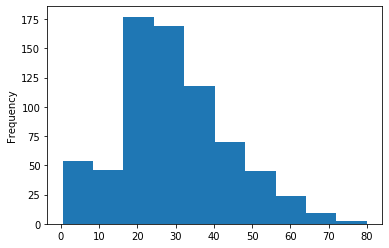

In [11]:
t_data['Age'].plot.hist()

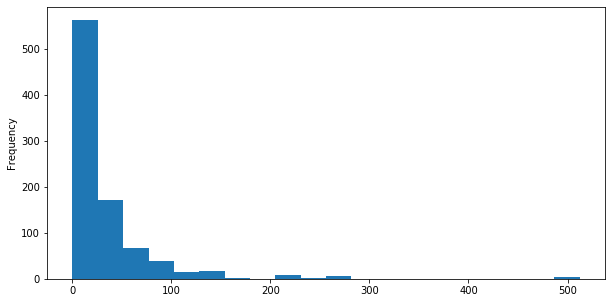

In [12]:
t_data['Fare'].plot.hist(bins=20,figsize=(10,5))

In [13]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


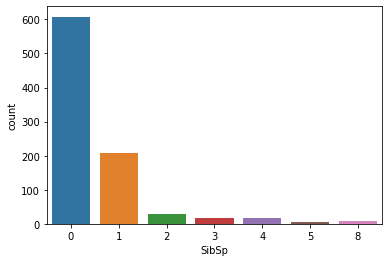

In [14]:
sns.countplot(x='SibSp',data=t_data)

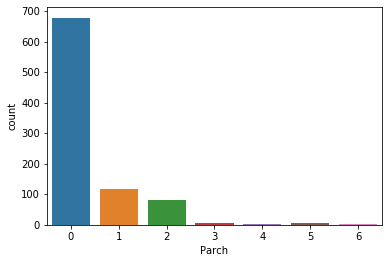

In [15]:
sns.countplot(x='Parch',data=t_data)

# STEP-3 DATA WRANGLING- clean the data by removing NaN Value and unnecessary columns in the datasets. 

In [16]:
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# visualization of missing values in heatmap

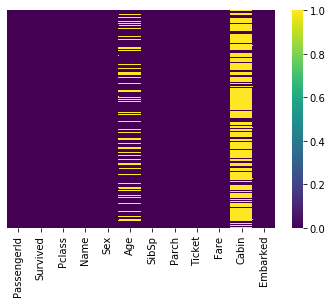

In [17]:
sns.heatmap(t_data.isnull(), yticklabels=False,cmap='viridis')

# no of aged passengers survived with respect to Pclass

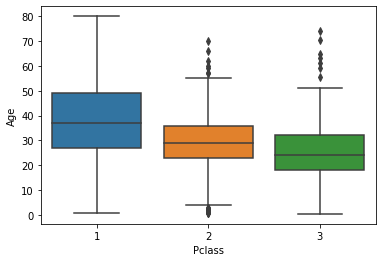

In [18]:
sns.boxplot(x='Pclass',y='Age',data=t_data)

# treating the missing values with the mean of Age

In [19]:
t_data['Age'].fillna(t_data.Age.mean(),inplace=True)

# checking the missing values has been removed or not

In [20]:
t_data['Age'].isnull().sum()

0

In [21]:
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# dropping CABIN column

In [22]:
t_data.drop('Cabin',axis=1,inplace=True)

In [23]:
t_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# treating missing values of embarked by fiiling Q

In [24]:
t_data.Embarked.fillna('Q',inplace = True)

# checking the missing values in heatmap

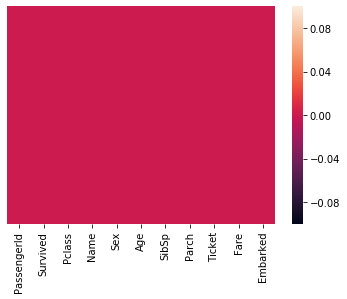

In [25]:
sns.heatmap(t_data.isnull(),yticklabels=False,cbar=True)

# using dummy columns for removing unneccessary labels

In [26]:
Sex=pd.get_dummies(t_data['Sex'],drop_first=True)

In [27]:
embarked=pd.get_dummies(t_data['Embarked'],drop_first=True)
pcl=pd.get_dummies(t_data['Pclass'],drop_first=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
t_data=pd.concat([t_data,embarked,Sex,pcl],axis=1)
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,1,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,0,1,0,0


# dropping the old columns say: sex, embarked and removing the unnecessary columns

In [29]:
t_data.drop(['Pclass','Embarked','Sex','PassengerId','Ticket','Name'],axis=1,inplace=True)

In [30]:
t_data

,Survived,Age,SibSp,Parch,Fare,Q,S,male,2,3
0,0,22.000000,1,0,7.2500,0,1,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0,0,0
2,1,26.000000,0,0,7.9250,0,1,0,0,1
3,1,35.000000,1,0,53.1000,0,1,0,0,0
4,0,35.000000,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,1,1,0
887,1,19.000000,0,0,30.0000,0,1,0,0,0
888,0,29.699118,1,2,23.4500,0,1,0,0,1
889,1,26.000000,0,0,30.0000,0,0,1,0,0


# TRAINING DATA

# splitting data into x and y

In [31]:
x=t_data.drop('Survived',axis=1)
y=t_data['Survived']

# Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

# checking multicollinearity for the variables of X

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
x_vif=add_constant(x)
pd.Series([variance_inflation_factor(x_vif.values,i)for i in range(x_vif.shape[1])],index=x_vif.columns)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    24.308448
Age       1.221156
SibSp     1.283726
Parch     1.335518
Fare      1.766149
Q         1.496429
S         1.510388
male      1.135515
2         2.081958
3         2.752402
dtype: float64

# train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.7)

In [37]:
log=LogisticRegression()
log.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
log.score(x_train,y_train)*100

80.14981273408239

In [39]:
pred=log.predict(x_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.90      0.85       381\n           1       0.80      0.66      0.72       243\n\n    accuracy                           0.80       624\n   macro avg       0.80      0.78      0.79       624\nweighted avg       0.80      0.80      0.80       624\n'

# confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test,pred)

array([[342,  39],
       [ 83, 160]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,pred)*100

80.44871794871796